**RFM Analysis**

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
df1=pd.read_csv('/content/2009-2010.csv')

In [4]:
df2=pd.read_csv('/content/2010-2011.csv')

In [5]:
(df1.shape, df2.shape)

((4999, 8), (4999, 8))

In [6]:
df2.isna()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4994,False,False,False,False,False,False,False,False
4995,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False


In [7]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [8]:
df2.columns


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [9]:
online_retail = pd.concat([df1, df2], ignore_index=True)

In [10]:
online_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [11]:
online_retail['InvoiceDate'] = pd.to_datetime(online_retail['InvoiceDate'])

In [12]:
online_retail['TotalPrice'] = online_retail['Quantity'] * online_retail['Price']

In [13]:
online_retail = online_retail[online_retail['Quantity'] > 0]

In [14]:
snapshot_date = online_retail['InvoiceDate'].max() + pd.Timedelta(days=1)

In [15]:
rfm_table = online_retail.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'count',  # Frequency
    'TotalPrice': 'sum'  # Monetary
})

In [16]:
rfm_table.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

In [17]:
print(rfm_table.head())

             Recency  Frequency  Monetary
Customer ID                              
12362.0          367          1    130.00
12431.0            2         14    358.25
12433.0            2         73   1919.14
12435.0          366          1   1008.00
12490.0          367         21    603.94


In [18]:
rfm_table['R_Score'] = pd.qcut(rfm_table['Recency'], q=4, labels=False, duplicates='drop')

# Convert the generated categorical codes to desired labels starting from 1
rfm_table['R_Score'] = pd.qcut(rfm_table['Recency'], q=4, duplicates='drop').cat.codes.add(1)

# Apply the same process to F_Score and M_Score
rfm_table['F_Score'] = pd.qcut(rfm_table['Frequency'], q=4, labels=False, duplicates='drop')
rfm_table['F_Score'] = pd.qcut(rfm_table['Frequency'], q=4, duplicates='drop').cat.codes.add(1)

rfm_table['M_Score'] = pd.qcut(rfm_table['Monetary'], q=4, labels=False, duplicates='drop')
rfm_table['M_Score'] = pd.qcut(rfm_table['Monetary'], q=4, duplicates='drop').cat.codes.add(1)

In [19]:
rfm_table['RFM_Score'] = rfm_table['R_Score'].astype(str) + rfm_table['F_Score'].astype(str) + rfm_table['M_Score'].astype(str)

In [20]:
print(rfm_table.head())

             Recency  Frequency  Monetary  R_Score  F_Score  M_Score RFM_Score
Customer ID                                                                   
12362.0          367          1    130.00        3        1        1       311
12431.0            2         14    358.25        1        2        3       123
12433.0            2         73   1919.14        1        4        4       144
12435.0          366          1   1008.00        2        1        4       214
12490.0          367         21    603.94        3        3        4       334


<ipython-input-21-1cd40bbbb769>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RFM_Score', data=rfm_table, order=rfm_table['RFM_Score'].value_counts().index, palette='viridis')


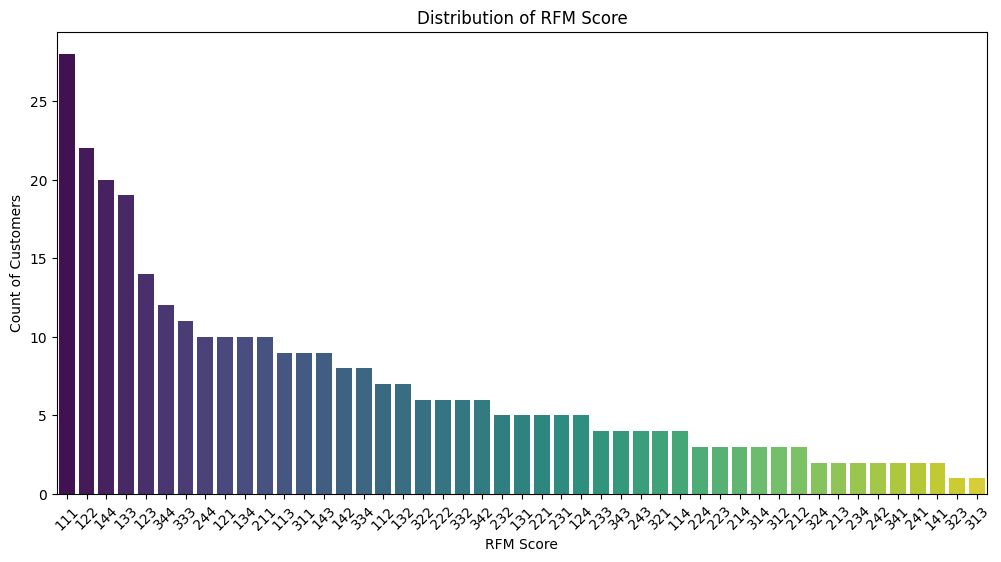

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='RFM_Score', data=rfm_table, order=rfm_table['RFM_Score'].value_counts().index, palette='viridis')
plt.title('Distribution of RFM Score')
plt.xlabel('RFM Score')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.show()


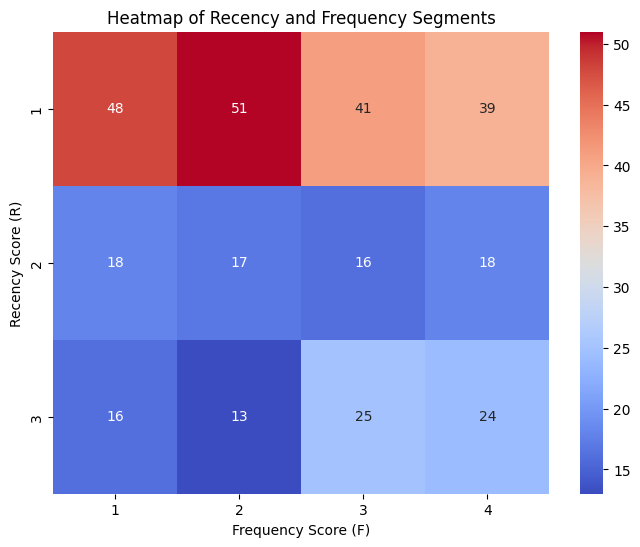

In [22]:
rfm_pivot = rfm_table.pivot_table(index='R_Score', columns='F_Score', values='RFM_Score', aggfunc='count')

plt.figure(figsize=(8, 6))
sns.heatmap(rfm_pivot, annot=True, fmt='.0f', cmap='coolwarm')
plt.title('Heatmap of Recency and Frequency Segments')
plt.xlabel('Frequency Score (F)')
plt.ylabel('Recency Score (R)')
plt.show()


<ipython-input-23-9d088ee1bd5e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RFM_Score', y='Monetary', data=rfm_table, palette='plasma')


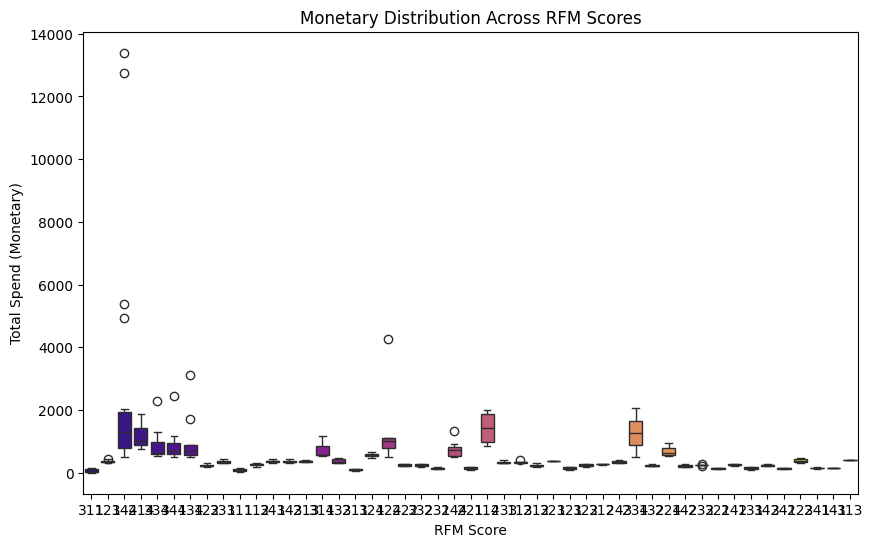

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RFM_Score', y='Monetary', data=rfm_table, palette='plasma')
plt.title('Monetary Distribution Across RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Total Spend (Monetary)')
plt.show()
